# Investigate Hotel Business using Data Visualization
## Rakamin Mini Project

## Data Preprocessing

### Import Data and Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('hotel_bookings_data.csv')
pd.set_option('display.max_columns', None)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
108889,City Hotel,0,62,2019,May,13,31,1,2,3,0.0,0,Breakfast,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,16.0,NaN,0,Personal,116.10,0,1,Check-Out
95310,City Hotel,0,46,2018,October,34,17,0,1,2,0.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,125.10,0,2,Check-Out
54681,City Hotel,1,185,2018,September,30,23,1,1,2,0.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,94.50,0,1,Canceled
5222,Resort Hotel,0,191,2018,June,17,22,1,2,2,0.0,0,Undefined,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,NaN,NaN,0,Family,85.33,0,0,Check-Out
38046,Resort Hotel,0,261,2019,August,26,28,2,8,2,0.0,0,Dinner,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,40.0,NaN,0,Contract,100.20,0,0,Check-Out


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Missing Value Treatment

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

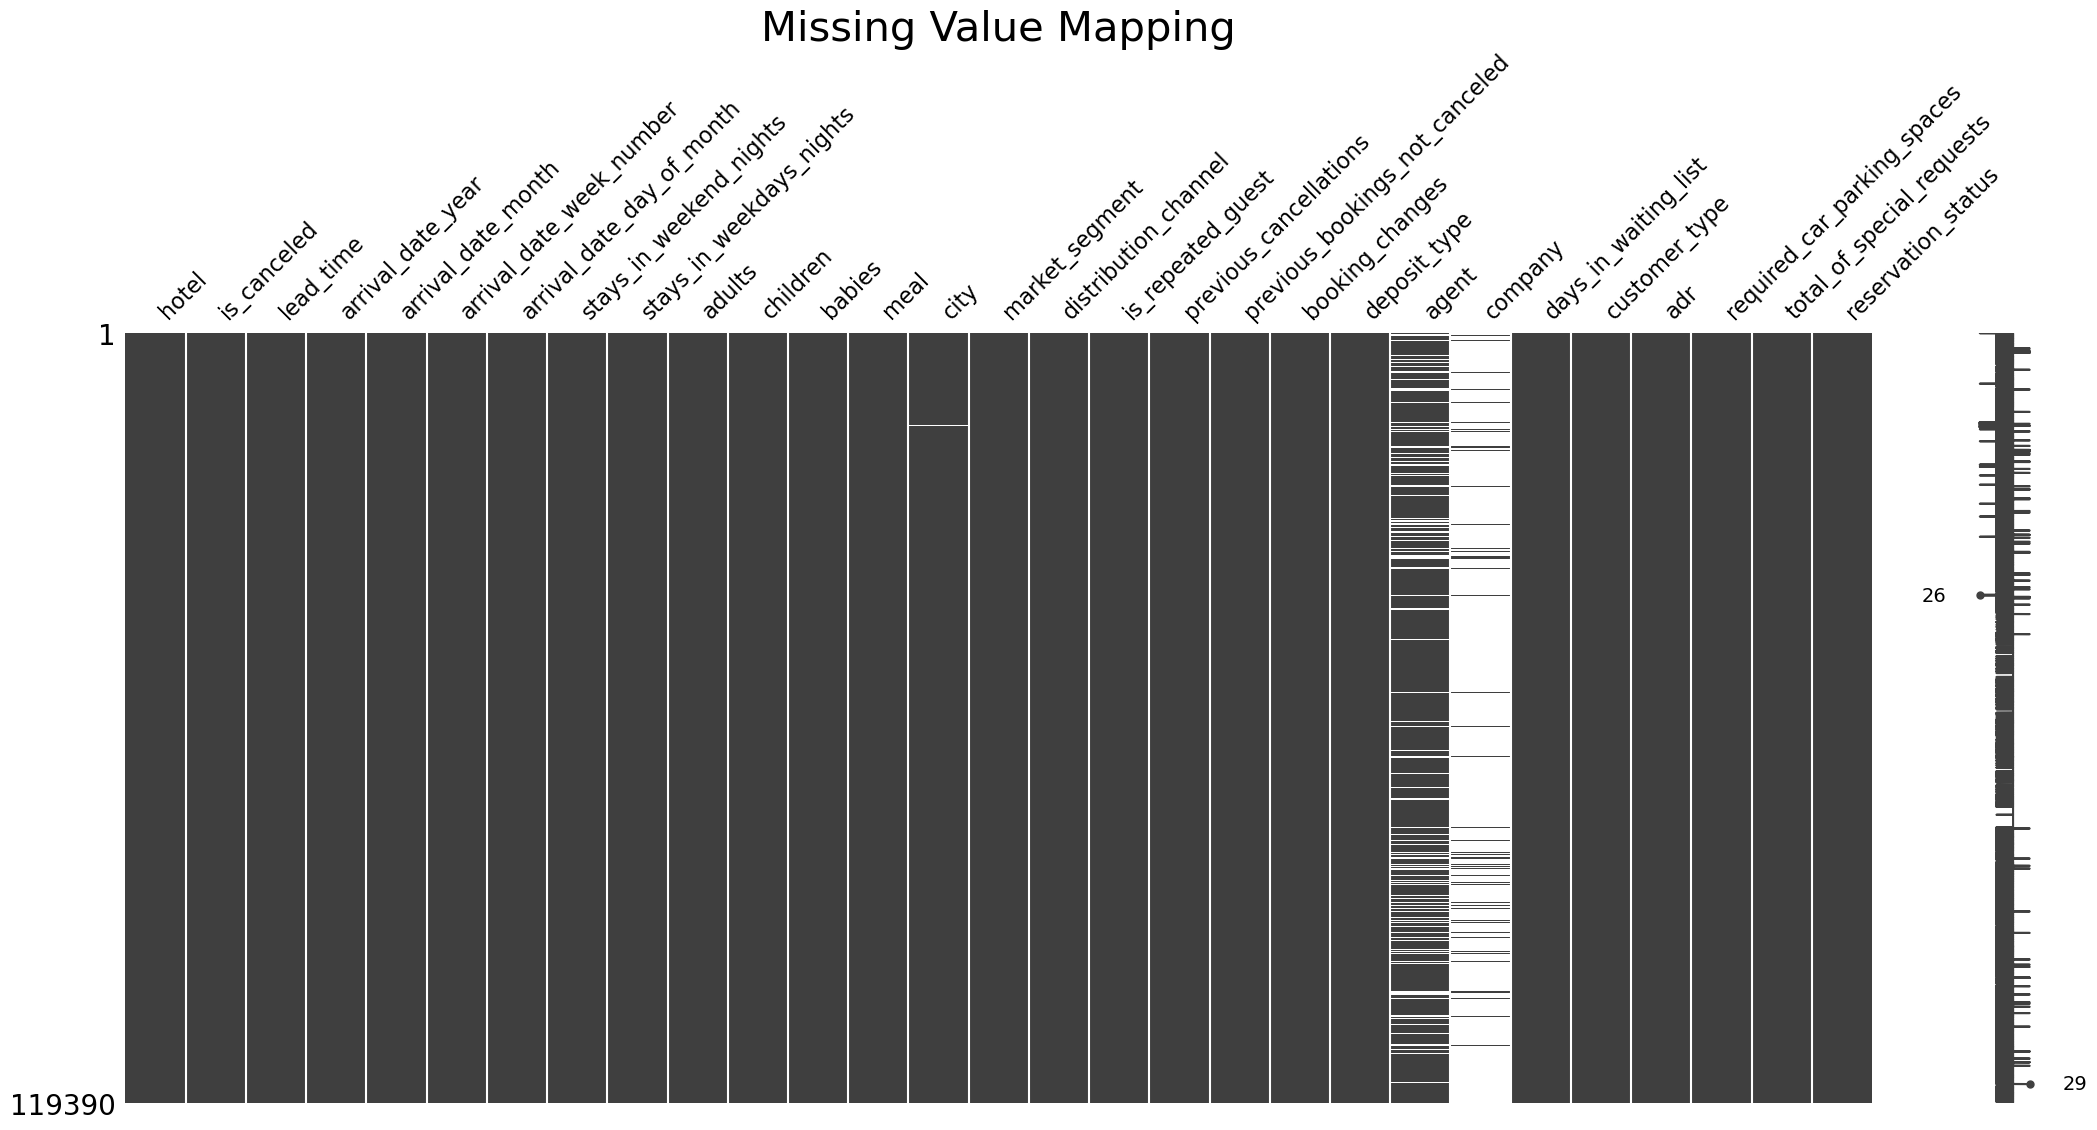

In [7]:
import missingno as msno
msno.matrix(df)
plt.title('Missing Value Mapping', fontsize = 30)
plt.show()

In [8]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing' : percent_missing}).reset_index(drop=True).sort_values(by=['percent_missing','sum_missing'], ascending=False)
missing_value_df.head(4)

,column_name,sum_missing,percent_missing
22,company,112593,94.31
21,agent,16340,13.69
13,city,488,0.41
10,children,4,0.00


#### What the best treatment for the missing values?
- The `company` column contains null values of as many as **112593 (94.31%)** . One thing is possible I can drop the column however, there is a chance I will lose the **vital information of 5.69%** of the data in that column. 
</br> So the best treatment is to **replace the null values with 0**. This also applies to the `agent` column.
</br> For `city` with 488 missing values(0.41%). I'll replace in the missing values with `'Not Avaliable'`
</br> Last but not least, I will drop 4 missing values in the `children` column.

In [9]:
df2 = df.copy()

In [10]:
val = {'company': 0, 'agent': 0, 'city':'Not Avaliable'}
df2.fillna(value = val, inplace = True)

df2.dropna(subset = ['children'], inplace = True)

In [11]:
df2.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Duplicated Data

In [12]:
df2.duplicated().sum()

33261

There are **33.261 Duplicated Rows** in this dataset, so I will drop them off 

In [13]:
df3 = df2.copy()

In [14]:
df3.drop_duplicates(keep='first', inplace=True)
df3.duplicated().sum()

0

### Invalid and Inconsistent Data

#### Invalid Values

In [15]:
df3.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000,86125.000000
mean,0.275553,79.249765,2018.215524,26.796180,15.806943,1.009765,2.633242,1.878537,0.140284,0.010984,0.039501,0.030572,0.186578,0.272000,81.202671,10.800522,0.645144,106.637686,0.085237,0.705033
std,0.446795,85.499178,0.683914,13.675397,8.840375,1.033409,2.058326,0.627560,0.458347,0.114424,0.194784,0.371474,1.744445,0.729544,109.965348,53.485626,9.282913,55.173794,0.283076,0.833531
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.750000,0.000000,1.000000
75%,1.000000,124.000000,2019.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.520000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


At first, it can be seen that this dataset has outliers in this dataset. We will discuss outliers at the next point.
<br> What I wat to underline here is the `adults` column where the MIN value is 0, which is unlikely because children cannot book rooms without adults. So, I'm going to drop rows where the `adults` column is 0.

In [16]:
df4=df3.copy()

In [17]:
df4.drop(df4[df4['adults'] == 0].index, inplace=True)
len(df4[df4['adults']==0])

0

#### Inconsistent Values

In [18]:
df5=df4.copy()

In [19]:
#Grouping the categorical features
cats = ['hotel', 'is_canceled', 'meal', 'city',
        'market_segment', 'distribution_channel',
        'is_repeated_guest', 'deposit_type',
        'customer_type', 'reservation_status']

In [20]:
for col in cats:
    unique_values = df5[col].unique()
    print(f'''Value count column {col}:''')
    print(f"{unique_values}")
    print()

Value count column hotel:
['Resort Hotel' 'City Hotel']

Value count column is_canceled:
[0 1]

Value count column meal:
['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']

Value count column city:
['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Not Avaliable' 'Kabupaten Tangerang'
 'Kota Semarang' 'Kota Serang' 'Kota Tangerang' 'Kota Bogor'
 'Kabupaten Bandung' 'Kabupaten Magelang' 'Kabupaten Sumedang'
 'Kota Jakarta Timur' 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu'
 'Kabupaten Belitung' 'Kota Jakarta Pusat' 'Kota Jakarta Selatan'
 'Kota Surabaya' 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi'
 'Kota Jakarta Barat' 'Kota Bengkulu' 'Kabupaten Bandung Barat'
 'Kabupaten Bekasi' 'Kabupaten Bogor' 'Kabupaten Ciamis'
 'Kabupaten Cianjur' 'Kabupaten Cirebon' 'Kota Cimahi'
 'Kabupaten Indramayu' 'Kabupaten Karawang' 'Kabupaten Kuningan'
 'Kabupaten Majalengka' 'Kabupaten Serang' 'Kota Pangkal Pinang'
 'Kabupaten Subang'

In [21]:
df5['distribution_channel'].value_counts().to_frame()

,distribution_channel
TA/TO,67843
Direct,12784
Corporate,4936
GDS,178
Undefined,1


In the `meal` column there are 5 values namely `['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']`
<br> For convenience, the value `Undefined` will be changed to `No Meal`.
<br> On the other hand, for the `distribution_channel` columns there are `'Undefined'` values, so I'm going to drop it because there is only one row that has value `'Undefined'`

In [22]:
df5.drop(df5[df5['distribution_channel'] == 'Undefined'].index, inplace=True)
df5['meal'].replace("Undefined", "No Meal", inplace=True)

In [23]:
df5['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [24]:
df5['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

### Redundant Columns

There are some redundant columns in this dataset, such as: 
1. Columns `'babies'`can be merge to `'children'` and adding new column as `'Total_guests'`by `'adults'` + `'children'`
2. Merging `'arrival_date_day_of_month'`, `'arrival_date_month'`and`'arrival_date_year' ` to create `'arrival_date'` column and changing its datatype to datetime
3. Create `'total_nights'` by `'stays_in_weekend_nights'` + `'stays_in_weekdays_nights'`

In [26]:
df6 = df5.copy()

In [44]:
df7= df5.copy()

#### 'Total_guests'

In [45]:
#Changing datatype from float to int
df7['children'] = df7['children'].astype(int)

In [46]:
#Merging Babies to Children
df7['children']=df7['children']+df7['babies']

In [47]:
df7['total_guests'] = df7['adults'] + df7['children']

In [49]:
# dropping rows that include 0 Total Guests
df7 = df7[df7['total_guests'] != 0]

#### 'arrival_date'

In [52]:
# Converting datatypes to string
df7['arrival_date_year'] = df7['arrival_date_year'].astype('str')
df7['arrival_date_month'] = df7['arrival_date_month'].astype('str')
df7['arrival_date_day_of_month'] = df7['arrival_date_day_of_month'].astype('str')

In [54]:
# Creating arrival_date column and changing its datatype to datetime

df7['arrival_date'] = df7['arrival_date_day_of_month'] + '-' + df7['arrival_date_month'] + '-' + df7['arrival_date_year']
df7['arrival_date'] = pd.to_datetime(df7['arrival_date'], errors = 'coerce')

In [56]:
# Changing arrival_date_month column to show month number instead of month name

import datetime as dt

df7['arrival_date_month'] = df7['arrival_date'].dt.month

#### 'total_nights'

In [65]:
# Creating 'total_nights'
df7['total_nights'] = df7['stays_in_weekend_nights'] + df7['stays_in_weekdays_nights']
df7.drop(['stays_in_weekend_nights', 'stays_in_weekdays_nights'], axis=1, inplace=True)

In [69]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84681 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84681 non-null  object        
 1   is_canceled                     84681 non-null  int64         
 2   lead_time                       84681 non-null  int64         
 3   adults                          84681 non-null  int64         
 4   children                        84681 non-null  int64         
 5   meal                            84681 non-null  object        
 6   city                            84681 non-null  object        
 7   market_segment                  84681 non-null  object        
 8   distribution_channel            84681 non-null  object        
 9   is_repeated_guest               84681 non-null  int64         
 10  previous_cancellations          84681 non-null  int64         
 11  p